In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
df = pd.read_csv('merc1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,0,2019.0,21998.0,2,11578.0,2,150.0,53.3,1.3
1,0,2014.0,10498.0,1,63177.0,0,30.0,64.2,2.1
2,0,2016.0,12498.0,1,54544.0,0,20.0,72.4,1.5
3,0,2018.0,17498.0,1,8601.0,2,145.0,51.4,1.6
4,0,2017.0,16798.0,1,24388.0,0,20.0,68.9,1.5
...,...,...,...,...,...,...,...,...,...
439,16,2016.0,26490.0,2,32494.0,0,200.0,45.6,2.2
440,16,2018.0,19498.0,1,24164.0,0,145.0,46.3,2.1
441,16,2018.0,20498.0,1,25254.0,0,145.0,46.3,2.1
442,16,2018.0,20498.0,1,20841.0,0,145.0,46.3,2.1


In [81]:
X = df.iloc[:, [True,True,False,True,True,True,True,True,True]]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,model,year,type,distance,fuel,tax,miles per galoon,size
0,0,2019.0,2,11578.0,2,150.0,53.3,1.3
1,0,2014.0,1,63177.0,0,30.0,64.2,2.1
2,0,2016.0,1,54544.0,0,20.0,72.4,1.5
3,0,2018.0,1,8601.0,2,145.0,51.4,1.6
4,0,2017.0,1,24388.0,0,20.0,68.9,1.5
...,...,...,...,...,...,...,...,...
439,16,2016.0,2,32494.0,0,200.0,45.6,2.2
440,16,2018.0,1,24164.0,0,145.0,46.3,2.1
441,16,2018.0,1,25254.0,0,145.0,46.3,2.1
442,16,2018.0,1,20841.0,0,145.0,46.3,2.1


In [82]:
f1 = ['year']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([2758.4975455]), -5540488.243003615)

Линейная регрессия имеет вид Цена = 2758.4975455*Год-5540488.243003615

In [83]:
y_pred = sr.predict(X_test[f1])
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.484, 0.35)

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(5939.77, 5539.86)

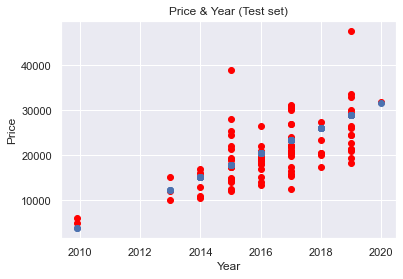

In [85]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], sr.predict(X_test[f1]), 'bo')
plt.title('Price & Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Согласно графику, цена авыше автомобиля, который был выпущен позже

In [86]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.768

Коэффициент регрессии = 0,768

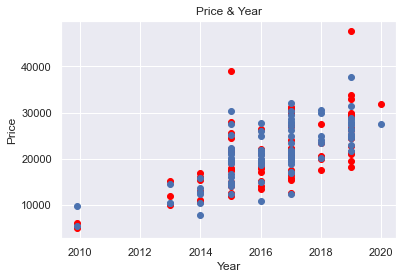

In [87]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], mr.predict(X_test), 'bo')
plt.title('Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [88]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          5.05e-105
Time:                        08:04:03   Log-Likelihood:                -3446.4
No. Observations:                 355   AIC:                             6911.
Df Residuals:                     346   BIC:                             6946.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.658e+06   3.37e+05    -13.824      0.000   -5.32e+06   -3.99e+06
model              211.8901     53.314      3.974      0.000     107.030     316.751
year              2321.6218    166.717     13.926      0.000    1993.716    2649.528
type               905.8682    247.032      3.667      0.000     419.996    1391.741
distance            -0.0963      0.018     -5.358      0.000      -0.132      -0.061
fuel              -440.4066    340.128     -1.295      0.196   -1109.384     228.571
tax                 -6.0108      4.660     -1.290      0.198     -15.177       3.155
miles per galoon  -198.2729     30.850     -6.427      0.000    -258.949    -137.597
size              4869.2433    600.453      8.109      0.000    3688.246    6050.241
==============================================================================
Omnibus:                       24.175   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.519
Skew:                           0.450   Prob(JB):                     2.62e-09
Kurtosis:                       4.365   Cond. No.                     4.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([-1.37435447e+08,  9.23369774e+04,  4.65413133e+05, -6.53061506e+05,
         3.89209251e+01, -3.83867730e+05, -2.00829085e+04, -1.19384836e+05,
        -2.99427137e+06, -1.84516610e+01, -4.69766245e+01, -1.31895175e+01,
        -5.35749168e-03, -6.86789128e+01,  4.44020535e+00,  2.56546826e+01,
         4.81349448e+02, -1.16743248e+02,  3.15248984e+02, -1.97592352e-02,
         1.96525792e+02,  9.86634919e+00,  5.85723668e+01,  1.49838624e+03,
         3.12277384e+03,  2.63915127e-02,  9.25135395e+01,  4.49700327e+01,
         8.21010735e+01,  2.36294282e+02,  1.54759618e-06,  3.37881678e-02,
         8.50529840e-04,  7.62108692e-03,  5.84750206e-02, -7.61252745e+03,
         1.43934300e+00,  3.09162836e+01, -7.31117782e+02,  2.13133967e-01,
         7.69648072e-01, -1.01952150e+01,  6.55911225e+00, -1.81056716e+02,
        -4.08876687e+03]),
 -326284428.5528365)

In [90]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.843

R^2 лучше для множественной линейной регресси.

In [91]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(3277.92, 4136.92)

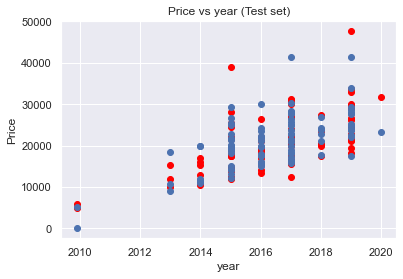

In [92]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], pr.predict(X_test_p), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

In [93]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('merc2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()